In [24]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

In [2]:
choco = pd.read_csv(r"C:\Users\sarthak\Downloads\Datasets\chocolate.csv")

In [3]:
#Where are the best cocoa beans grown?
#Which countries produce the highest-rated bars?
#What’s the relationship between cocoa solids percentage and rating?
choco.columns = ["company","bean_origin","ref","review","cocoa_percent","location","rating","bean_type","broad_bean_origin"]
choco.head()

,company,bean_origin,ref,review,cocoa_percent,location,rating,bean_type,broad_bean_origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [4]:
def all_about_database(df):
    print("Here is some details that may be required in understanding the data")
    print("Number of Instances:",df.shape[0])
    print("Number of  features:",df.shape[1])
    print("Columns:",df.columns)
    print("\nSummary:")
    print(df.describe())
    print("\nMissing Values details:")
    print(df.isna().sum())
    
all_about_database(choco)

Here is some details that may be required in understanding the data
Number of Instances: 1795
Number of  features: 9
Columns: Index(['company', 'bean_origin', 'ref', 'review', 'cocoa_percent', 'location',
       'rating', 'bean_type', 'broad_bean_origin'],
      dtype='object')

Summary:
               ref       review       rating
count  1795.000000  1795.000000  1795.000000
mean   1035.904735  2012.325348     3.185933
std     552.886365     2.927210     0.478062
min       5.000000  2006.000000     1.000000
25%     576.000000  2010.000000     2.875000
50%    1069.000000  2013.000000     3.250000
75%    1502.000000  2015.000000     3.500000
max    1952.000000  2017.000000     5.000000

Missing Values details:
company              0
bean_origin          0
ref                  0
review               0
cocoa_percent        0
location             0
rating               0
bean_type            1
broad_bean_origin    1
dtype: int64


In [5]:
choco.dropna(axis=0,inplace=True)

In [6]:
def rate(num):
    return round(num)
choco["rating_dummy"] = choco.rating.apply(rate)

In [7]:
def rem(a):
    b = str(a)
    b = b[:-1]
    return float(b)/100

choco.cocoa_percent = choco.cocoa_percent.apply(rem)


In [9]:
choco.bean_type.unique()
choco[choco.bean_type=="\xa0"]

,company,bean_origin,ref,review,cocoa_percent,location,rating,bean_type,broad_bean_origin,rating_dummy
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,,Sao Tome,4
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,,Togo,3
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,,Togo,3
3,A. Morin,Akata,1680,2015,0.70,France,3.50,,Togo,4
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,,Peru,4
...,...,...,...,...,...,...,...,...,...,...
1787,Zotter,Santo Domingo,879,2012,0.70,Austria,3.75,,Dominican Republic,4
1789,Zotter,"Indianer, Raw",883,2012,0.58,Austria,3.50,,,4
1790,Zotter,Peru,647,2011,0.70,Austria,3.75,,Peru,4
1793,Zotter,Kerala State,781,2011,0.62,Austria,3.25,,India,3


Text(0.5, 1.0, 'Average Cocoa percentage since 2006')

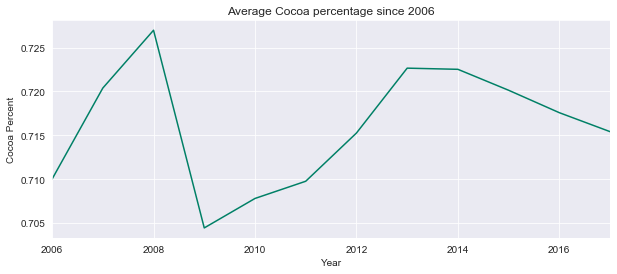

In [66]:
plt.figure(figsize=(10,4))
choco.groupby("review")["cocoa_percent"].mean().plot(cmap='summer')
plt.xlabel("Year")
plt.ylabel("Cocoa Percent")
plt.title("Average Cocoa percentage since 2006")

1) From the graph we can conclude that there was quite a dip in year 2008 and after that there is continious rise till 2013 and after that again it starts to dip. 2nd dip is much lower than 1st dip.<br>

2) 2008 : In 2008, there  was a peak(10 years high), some of the reasons for higher cocoa percentage in year 2018 can be lower cocoa price or higher production. There may be some prediction with cocoa percentage that people started liking chocolates with higher cocoa percentage thats why companies started producing chocolates with higher cocoa percentage.<br>

3) Also, there is a drop in year 2009, that drop is 0.030(cocoa percent) which may not be much. But considering it big, there can be some issues in that year due to which cocoa was less available.

(2006, 2017)

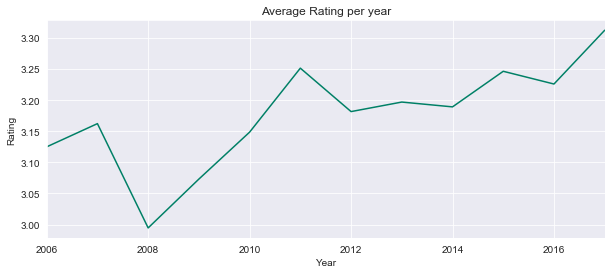

In [26]:
plt.figure(figsize=(10,4))
choco.groupby("review")["rating"].mean().plot(cmap='summer')
plt.xlabel("Year")
plt.ylabel("Rating")
plt.title("Average Rating per year")
x_min = 2006
x_max = 2017
plt.xlim(x_min,x_max,1)

This graph is between mean rating and year. Rating is suddenly dropped in 2008 and then increased and further remained in particular band width. 

Text(0.5, 0, 'Year')

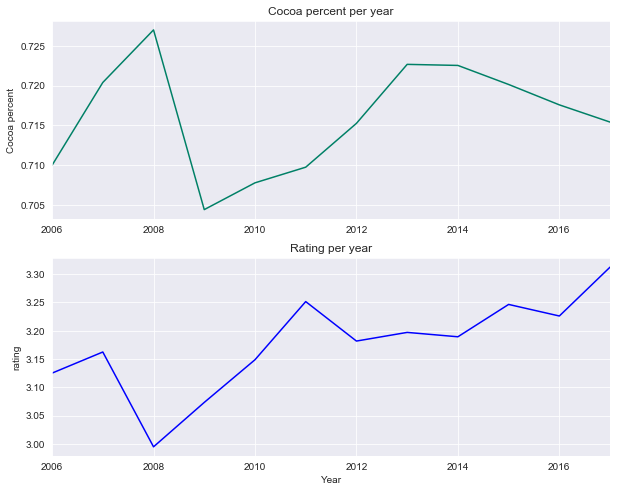

In [27]:
plt.figure(figsize=(10,8))
plt.subplot(211)
choco.groupby("review")["cocoa_percent"].mean().plot(cmap='summer')
plt.ylabel("Cocoa percent")
plt.xlabel("")
plt.title("Cocoa percent per year")
plt.subplot(212)
choco.groupby("review")["rating"].mean().plot(cmap='winter')
plt.ylabel("rating")
plt.title("Rating per year")
plt.xlabel("Year")

1) We can see some corelation between cocoa percentage and rating. <br>
2) It is negative corelation as we can see there is sudden peak in Cocoa percent in year 2008 and there is quite a dip in Rating in the same year.<br>
3) Negetive corelation can also be seen from year 2013 to 2017, in that time cocoa percent decrease and rating increased.<br>

Text(0.5, 1, 'Corelation plot between Rating and Cocoa Percent')

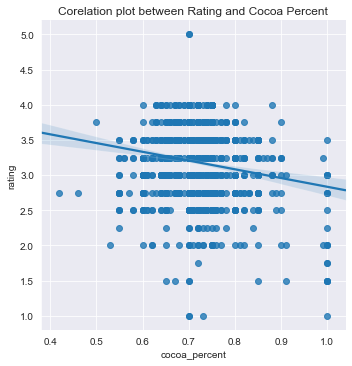

In [68]:
sns.lmplot("cocoa_percent","rating",data=choco)
plt.title("Corelation plot between Rating and Cocoa Percent")

We can see from this that there is a very weak negative corelation between cocoa percent and rating. 

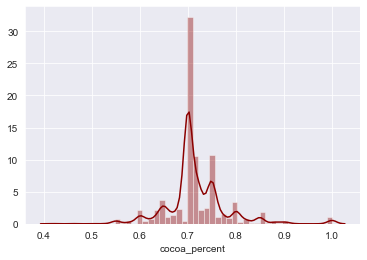

In [63]:
sns.distplot(choco.cocoa_percent,color='darkred')

The spread of cocoa percent signifies that both higher and lower percent of cocoa percent is not manufactured.<br>
Highest manufactuing range of cocoa percentage is 0.65-0.75.<br>
Highest peak is at 0.70.

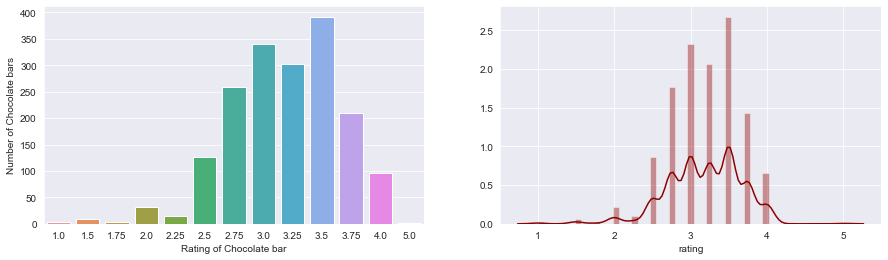

In [64]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.countplot(choco.rating)
plt.xlabel("Rating of Chocolate bar")
plt.ylabel("Number of Chocolate bars")
plt.subplot(1,2,2)
sns.distplot(choco.rating,color="darkred")

We can see that the rating is evenly spread with peak at 3.5 and then at 3.<br>
However the distrribution is quite even.

Text(0.5, 1.0, 'Average Rating for top 10 rated countries')

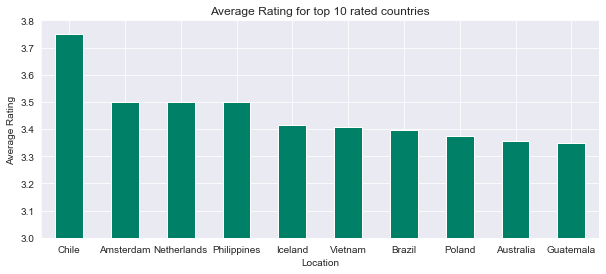

In [32]:
plt.figure(figsize=(10,4))
choco.groupby("location")["rating"].mean().sort_values(ascending=False).head(10).plot(kind="bar",cmap='summer')
plt.ylim(3,3.8)
plt.xticks(rotation="horizontal")
plt.xlabel("Location")
plt.ylabel("Average Rating")
plt.title("Average Rating for top 10 rated countries")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

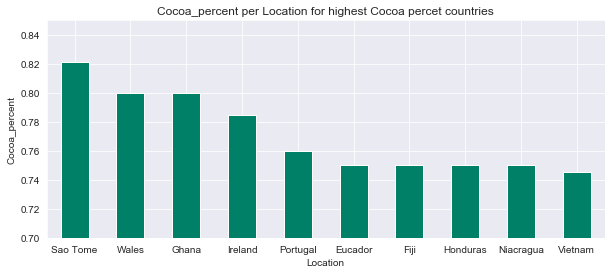

In [36]:
plt.figure(figsize=(10,4))
choco.groupby("location")["cocoa_percent"].mean().sort_values(ascending=False).head(10).plot(kind="bar",cmap='summer')
plt.ylim([0.7,0.85])
plt.xlabel("Location")
plt.ylabel("Cocoa_percent")
plt.title("Cocoa_percent per Location for highest Cocoa percet countries")
plt.xticks(rotation='horizontal')

Text(0.5, 1.0, '10 Companies with highest average rating')

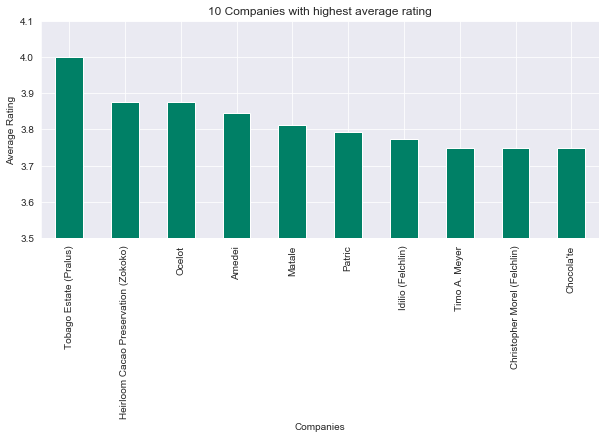

In [40]:
plt.figure(figsize=(10,4))
choco.groupby("company")["rating"].mean().sort_values(ascending=False).head(10).plot(kind="bar",cmap='summer')
plt.ylabel("Average Rating")
plt.ylim([3.5,4.1])
plt.xlabel("Companies")
plt.title("10 Companies with highest average rating")

Text(0.5, 1.0, '10 companies with worst average rating')

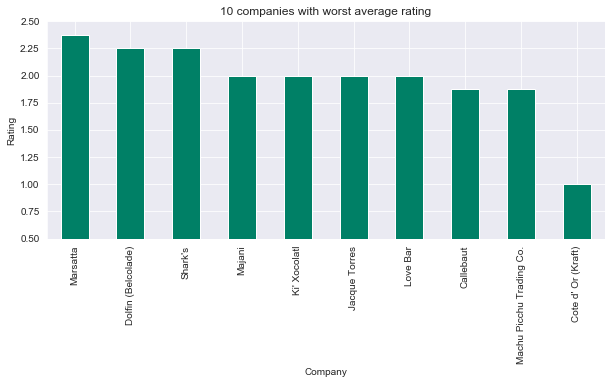

In [39]:
plt.figure(figsize=(10,4))
choco.groupby("company")["rating"].mean().sort_values(ascending=False).tail(10).plot(kind="bar",cmap='summer')
plt.ylabel("Rating")
plt.ylim([0.5,2.5])
plt.xlabel("Company")
plt.title("10 companies with worst average rating")

Text(0.5, 1.0, '10 companies with highest cocoa percentage')

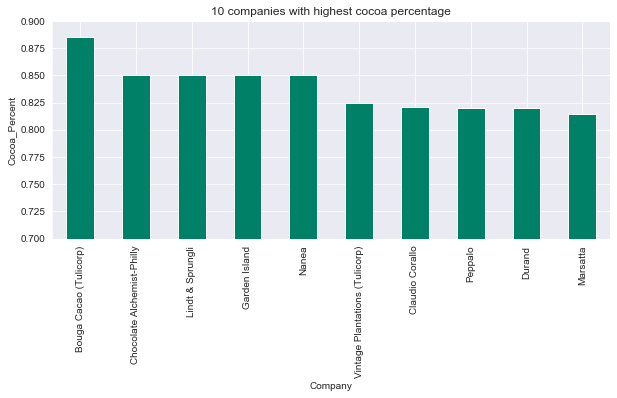

In [42]:
plt.figure(figsize=(10,4))
choco.groupby("company")["cocoa_percent"].mean().sort_values(ascending=False).head(10).plot(kind="bar",cmap='summer')
plt.ylabel("Cocoa_Percent")
plt.ylim([0.7,0.9])
plt.xlabel("Company")
plt.title("10 companies with highest cocoa percentage")

Text(0.5, 1.0, '10 companies with least cocoa percentage')

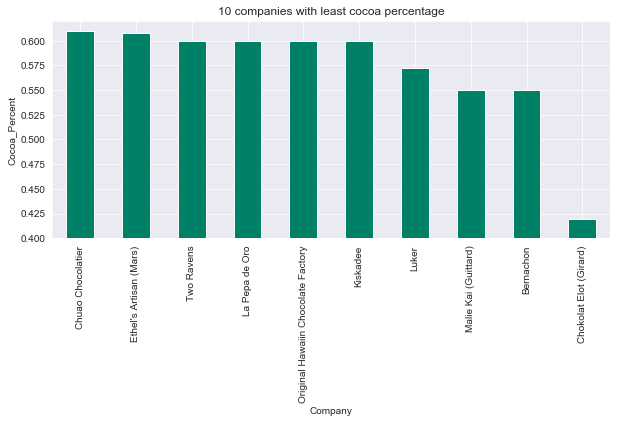

In [72]:
plt.figure(figsize=(10,4))
choco.groupby("company")["cocoa_percent"].mean().sort_values(ascending=False).tail(10).plot(kind="bar",cmap='summer')
plt.ylabel("Cocoa_Percent")
plt.ylim([0.4,0.62])
plt.xlabel("Company")
plt.title("10 companies with least cocoa percentage")

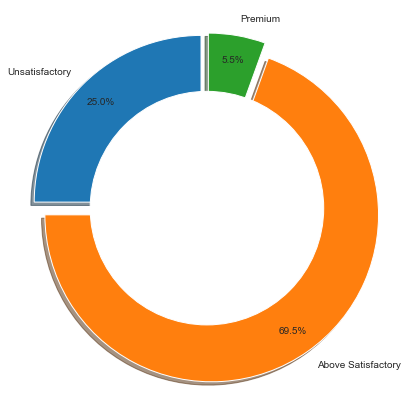

In [79]:
unsatisfactory = choco[choco['rating'] < 3.0]
satisfactory = choco[(choco['rating'] >= 3.0) & (choco.rating < 4)]
premium = choco[choco['rating'] >= 4.0]
label_names=['Unsatisfactory','Above Satisfactory','Premium']
sizes = [unsatisfactory.shape[0],satisfactory.shape[0],premium.shape[0]]

explode = (0.05,0.05,0.05)
my_circle=plt.Circle((0,0),0.7,color='white')
plt.figure(figsize=(6,6))
plt.pie(sizes,labels=label_names,explode=explode,autopct='%1.1f%%',pctdistance=0.85,startangle=90,shadow=True)
fig=plt.gcf()
fig.gca().add_artist(my_circle)
plt.axis('equal')
plt.tight_layout()

Around 70 percent of chocolates are Above satisfactory, 25 percent is unsatisfactory and around 5.5 percent is Premium.